In [1]:
#==========================================
# DATA CLEANING PROJECT: NYC AIRBNB 2019 DATASET
#==========================================

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\patil\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\patil\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
pd.set_option('display.max_columns',None)
sns. set(style="whitegrid")

In [4]:
df = pd.read_csv("AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [6]:
print("\n Missing Values")
print(df.isnull().sum())


 Missing Values
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [7]:
print("\n📈 Statistical Summary:")
print(df.describe())


📈 Statistical Summary:
                 id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min         

In [8]:
# DATA INTEGRITY CHECK

In [9]:
print(df.duplicated().sum())


0


In [10]:
df = df.drop_duplicates()

In [12]:
print(df['id'].is_unique)

True


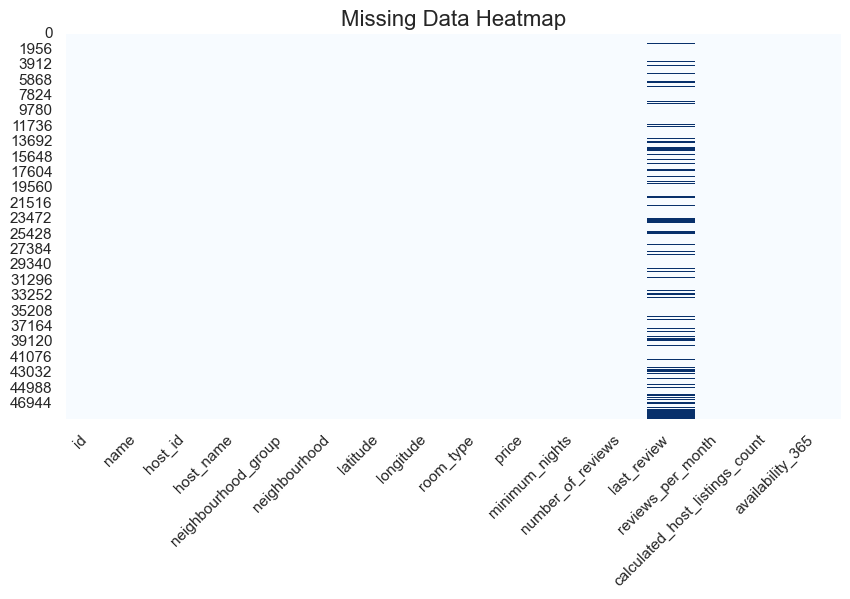


 Percentage of missing values per column:
id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.000000
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                  0.000000
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64


In [21]:
#MISSING VALUES
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False, cmap='Blues')
plt.xticks(rotation = 45, ha = 'right')
plt.title("Missing Data Heatmap", fontsize = 16)
plt.show()

# FILL MISSING 'REVIEW_PER_MONTH'WITH 0
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

#FILL MISSING HOST_NAME WITH 'UNKNONW'
df['host_name'] = df['host_name'].fillna('unknown')

missing_percent = df.isnull().mean() * 100
print("\n Percentage of missing values per column:")
print(missing_percent)

In [24]:
# FIX DATA TYPE

#Convert 'last_review' to datetime
df['last_review'] = pd.to_datetime(df['last_review'], errors = 'coerce')

#Ensure numeric columes are correct
df['price'] = df['price'].astype(float)
df['minimum_neights'] = df['minimum_nights'].astype(int)

# Standardization
#clean text columns
df['neighbourhood_group'] = df['neighbourhood_group'].str.strip().str.title()
df['neighbourhood'] = df['neighbourhood'].str.strip().str.title
df['room_type'] = df['room_type'].str.strip().str.lower()



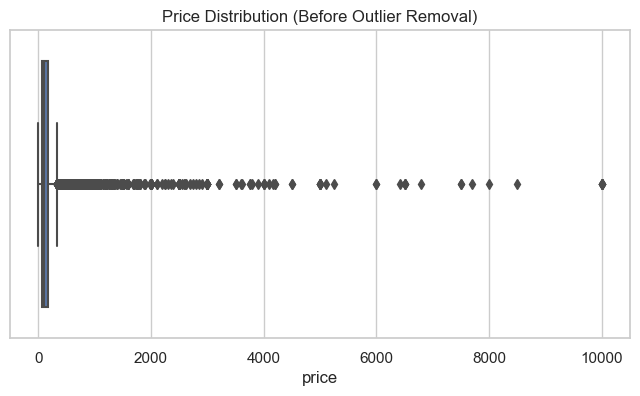

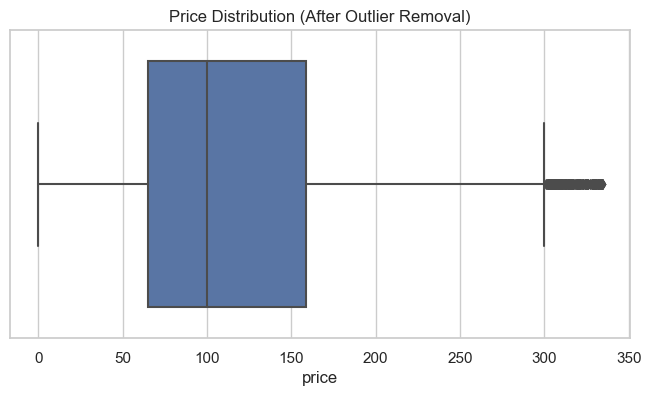


✅ Outliers handled. Dataset shape: (45923, 17)


In [25]:
#OUTLIER DETECTION AND HANDLING

# Visualize price distribution
plt.figure(figsize=(8,4))
sns.boxplot(x=df['price'])
plt.title("Price Distribution (Before Outlier Removal)")
plt.show()

# Remove extreme outliers using IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

plt.figure(figsize=(8,4))
sns.boxplot(x=df['price'])
plt.title("Price Distribution (After Outlier Removal)")
plt.show()

print(f"\n Outliers handled. Dataset shape: {df.shape}")

In [26]:
#CONSISTENCY CHECKS

# Ensure minimum_nights are reasonable
df = df[df['minimum_nights'] <= 365]

# Ensure availability_365 is within valid range
df = df[(df['availability_365'] >= 0) & (df['availability_365'] <= 365)]

print("\n Consistency checks completed.")


✅ Consistency checks completed.


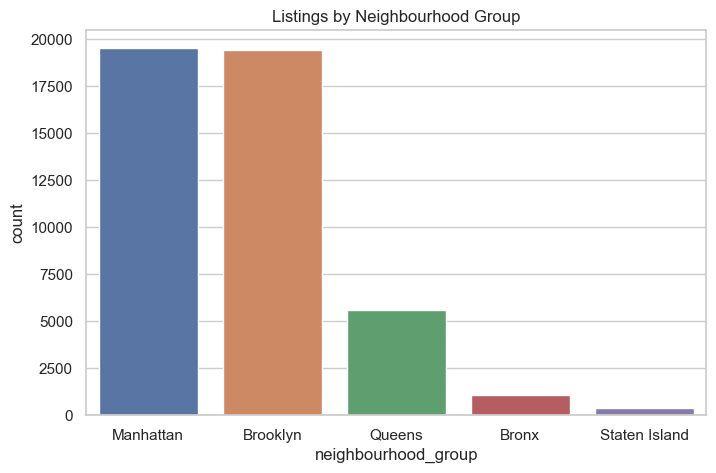

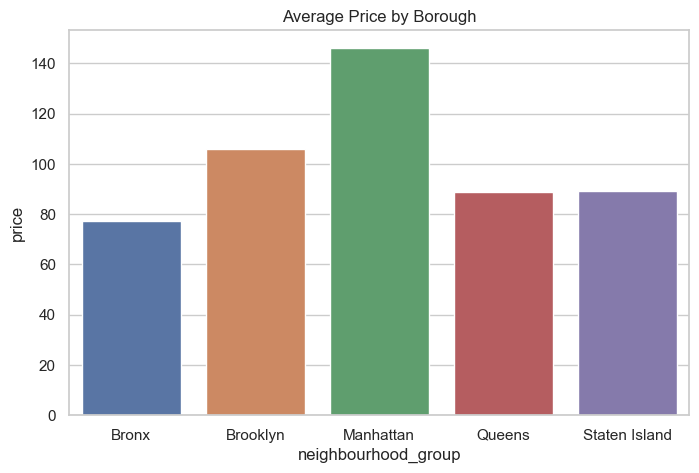

In [27]:
# QUICK EXPLORATORY CHECKS
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='neighbourhood_group', order=df['neighbourhood_group'].value_counts().index)
plt.title("Listings by Neighbourhood Group")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(data=df.groupby('neighbourhood_group')['price'].mean().reset_index(),
            x='neighbourhood_group', y='price')
plt.title("Average Price by Borough")
plt.show()

In [28]:
#Clean data 
df.to_csv("AB_NYC_2019_cleaned.csv", index=False)
print("\n💾 Cleaned dataset saved as 'AB_NYC_2019_cleaned.csv'.")


💾 Cleaned dataset saved as 'AB_NYC_2019_cleaned.csv'.


In [29]:
print("""
 DATA CLEANING SUMMARY:

1 Removed duplicates for data integrity
2 Handled missing values (imputation and fill)
3 Fixed data types and ensured consistency
4 Standardized text for uniform categories
5 Detected and removed outliers (IQR method)
6 Checked logical data constraints
7 Saved final cleaned dataset for analysis

 Project Complete — Clean, Consistent, and Reliable Data Ready!
""")


 DATA CLEANING SUMMARY:

1 Removed duplicates for data integrity
2 Handled missing values (imputation and fill)
3 Fixed data types and ensured consistency
4 Standardized text for uniform categories
5 Detected and removed outliers (IQR method)
6 Checked logical data constraints
7 Saved final cleaned dataset for analysis

 Project Complete — Clean, Consistent, and Reliable Data Ready!

